In [107]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")


In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics

from sklearn import preprocessing


<h1>Basic Regression Algorithms</h1>

Here we review seven of the most well-known regression algorithms. 

Four variations of linear regression:

<ul>
    <li>Logistic Regression.</li>
    <li>Ridge Linear Regression.</li>
    <li>Lasso Linear Regression.</li>
    <li>Elastic Net Regression.</li>
</ul>
and three non-linear that we already know as classification algorithms:
<ul>
    <li>k-nn - k-Nearest Neighbors.</li>
    <li>CART - Classification and Regression Trees.</li>
    <li>SVM - Support Vector Machines.</li>
</ul>

Again we will compare the result and plot it, trying to address the question of which algorithm works better with this dataset. 

For the dataset, we will use a well-known one that we previously used: the Boston Housing Price with a 10-fold cross-validation. Obviously in this case the objective is to approximate the pricing. 

As a metric we will use the mean squarred error. Please note that scikit-learn follows a convention that imposes all metrics to be sorted in ascending order, therefore the larger is always better. In order to follow this convention, mean squarred error is expressed with a negative sign, so larger is better (in this case 0). 



<img src="boston.jpg">
<img src="Boston-Dataset-char.png">


In [109]:
# Load the Boston dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="HousingData.csv"
b_housing=pd.read_csv(filename)
b_housing.head()

b_housing.fillna(0,inplace=True) # we have NaN

# First we separate into input and output components
array=b_housing.values
X=array[:,0:13]
y=array[:,13]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,0.00


# Linear Regression

You all are probably familiar with linear regression! 

Just a small reminder, it assumes a Gaussian distribution and that all variables are relevant. It also assumes that variables are not highly correlated (a problem called collinearity).

We will discuss both the statistical approach to Linear Regression and the Machine Learning approach. You will see that in the statistical approach we seek to fit a model to an existing set of data with the objective to find the components that explain this fit. In contrast, in machine learning we aim to build a model that is able to work well and predict with unknown sets of data. 

We will use the <b>LinearRegression</b> class.

In [110]:
# Linear Regression as used in statistics and social science
#  we use statsmodel

import statsmodels.api as sm

X_pd=b_housing.copy()
X_pd=X_pd.drop(["MEDV"],axis=1)
y_pd=b_housing["MEDV"]

X_pd=sm.add_constant(X_pd)
model = sm.OLS(y_pd,X_pd).fit()

model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          2.06e-129
Time:                        01:37:01   Log-Likelihood:                -1511.9
No. Observations:                 506   AIC:                             3052.
Df Residuals:                     492   BIC:                             3111.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2336      5.204      6.387      0.000      23.009      43.458
CRIM          -0.1162      0.033     -3.547      0.000      -0.181      -0.052
ZN             0.0429      0.014      3.136      0.002       0.016       0.070
INDUS         -0.0315      0.052     -0.601      0.548      -0.134       0.071
CHAS           3.1311      0.892      3.510      0.000       1.378       4.884
NOX          -17.3454      3.727     -4.654      0.000     -24.669     -10.022
RM             4.3036      0.412     10.458      0.000       3.495       5.112
AGE           -0.0151      0.010     -1.494      0.136      -0.035       0.005
DIS           -1.4844      0.196     -7.592      0.000      -1.868      -1.100
RAD            0.2685      0.067      3.998      0.000       0.137       0.400
TAX           -0.0109      0.004     -2.874      0.004      -0.018      -0.003
PTRATIO       -0.9815      0.134     -7.348      0.000      -1.244      -0.719
B              0.0094      0.003      3.373      0.001       0.004       0.015
LSTAT         -0.3918      0.044     -8.817      0.000      -0.479      -0.304
==============================================================================
Omnibus:                      188.045   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1006.627
Skew:                           1.541   Prob(JB):                    2.59e-219
Kurtosis:                       9.184   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# Linear Regression with scikit-learn

from sklearn.linear_model import LinearRegression

kfold=KFold(n_splits=10, random_state=7)

model=LinearRegression()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Linear Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Lin"

resall=pd.concat([resall,res_w1], ignore_index=True)

# Now lets use it in the same way than the statsmodel

model_x=LinearRegression()
model_x.fit(X,y)
print(f'Intercept {model_x.intercept_:.4f}')
print("Coefficients ",model_x.coef_)

y_pred_x=model_x.predict(X)

print(f'MAE - Mean Absolute Error {metrics.mean_absolute_error(y, y_pred_x):.3f}')
print(f'MSE - Mean Square Error  {metrics.mean_squared_error(y, y_pred_x):.3f}')
print(f'R2    {metrics.r2_score(y, y_pred_x):.3f}')

Linear Regression - MSE -34.090 std 44.046


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept 33.2336
Coefficients  [ -0.116   0.043  -0.032   3.131 -17.345   4.304  -0.015  -1.484   0.269
  -0.011  -0.981   0.009  -0.392]
MAE - Mean Absolute Error 3.308
MSE - Mean Square Error  23.058
R2    0.727


# Ridge Regression

The Ridge regession corresponds to modern linear regression algorithms that aim to be more robust to outliers. 

In this case the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficietn values (also called the L2-norm). 

We will use the <b>Ridge</b> class.


In [112]:
# Ridge Regression 

from sklearn.linear_model import Ridge

kfold=KFold(n_splits=10, random_state=7)

model=Ridge()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Ridge Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Ridge"

resall=pd.concat([resall,res_w1], ignore_index=True)

Ridge Regression - MSE -33.384 std 44.258


# Lasso Regression

Again is a modern regression algorithm that aims a reducing the weight of outliers. 

In this case the loss function is modified measuring the complexity of the model as the sum absolute value of the coefficients values (also called the L1-norm).

You can construct a Lasso model using the <b>Lasso</b> class.

In [113]:
# Lasso Regression 

from sklearn.linear_model import Lasso

kfold=KFold(n_splits=10, random_state=7)

model=Lasso()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Lasso Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Lasso"

resall=pd.concat([resall,res_w1], ignore_index=True)

Lasso Regression - MSE -35.161 std 32.383


# ElasticNet Regression

The ElasticNet Regression combines both the Ridge and the Lasso. 

It penalizes the model using both the L1-norm and the L2-norm. 

You can construct an ElasticNet model using the <b>ElasticNet</b> class.

In [114]:
# ElasticNet Regression 

from sklearn.linear_model import ElasticNet

kfold=KFold(n_splits=10, random_state=7)

model=ElasticNet()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'ElasticNet Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="ElasticNet"

resall=pd.concat([resall,res_w1], ignore_index=True)

ElasticNet Regression - MSE -33.109 std 26.963


# k-nn k-Nearest Neighbors

k-Nearerst Neighbors is a non-linear machine learning algorithm that uses distance metrics to find the most similar k-elements, taking the mean or median outcome of the neighbors as the prediction.

One interesting advantage of this algorithm is that we can choose a different metric for calculating the distance. The default metric is Minkowski, equivalent to euclidean (with p=2). It can be easily transformed to Mnahattan distance with p=1. 

For constructing a knn model for regression you must use the <b>KNeighorsRegressor</b> class.

In [115]:
# KNN Regression 

from sklearn.neighbors import KNeighborsRegressor

kfold=KFold(n_splits=10, random_state=7)

model=KNeighborsRegressor()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'KNN Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="KNN"

resall=pd.concat([resall,res_w1], ignore_index=True)

KNN Regression - MSE -97.175 std 50.572


# CART - Classification and Regression Trees

Cart builds a binary tree from the data where the splits are chosen greedly evaluating all the attributes in order to minimize a cost function. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.

For CART we will use the <b>DecisionTreeRegressor</b> class.


In [116]:
# Decision Trees Regression

# Please observe that in this case repeating the algorithm gives different results
# scaling doesn't matter in this case - you get different results but inside the range 

from sklearn.tree import DecisionTreeRegressor

kfold=KFold(n_splits=10, random_state=7)

model=DecisionTreeRegressor()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Decision Trees Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Trees"

resall=pd.concat([resall,res_w1], ignore_index=True)

Decision Trees Regression - MSE -38.452 std 30.760


# Support Vector Machines

Support vector machines seeks a line that separates best two classes. The data instances that are closest to this line are, better separating the classes, are called support vectors. 

Support Vector Machines have the advantage that you can change the kernel function to use. Radial basis function is used by default, a pretty powerful one. 

You can construct a SVM model for regression with the <b>SVR</b> class.

In [117]:
# SVM - Support Vector Machines

from sklearn.svm import SVR

kfold=KFold(n_splits=10, random_state=7)

model=SVR(gamma="auto")

scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'SVM Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="SVM"

resall=pd.concat([resall,res_w1], ignore_index=True)


SVM Regression - MSE -91.129 std 71.147


# Algorithm Comparison

<Figure size 1080x648 with 0 Axes>

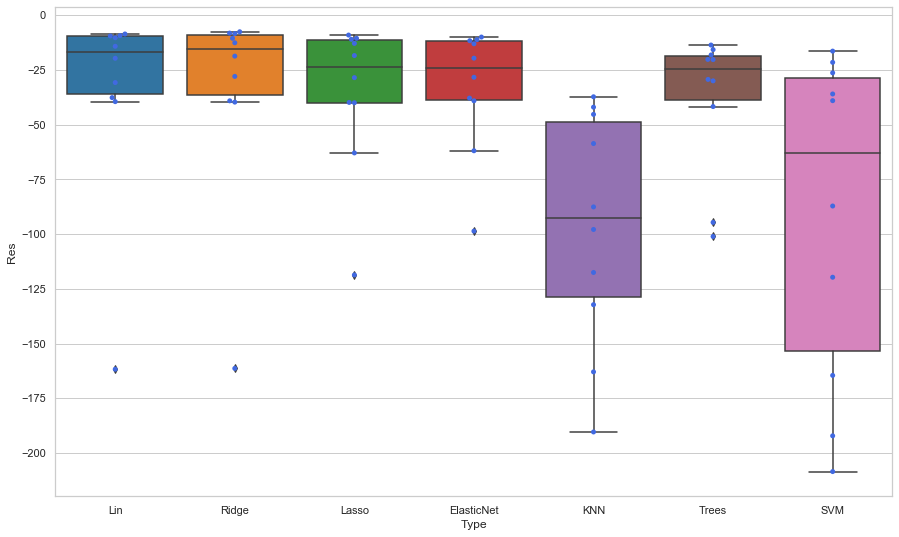

In [118]:
# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

<b><font color="red" size=6>Mission 1</font>

a) Let's predict movie revenue using the Movie Database in Kaggle https://www.kaggle.com/c/tmdb-box-office-prediction
<br><br>
</b>